In [9]:
%pylab inline
import pandas as pd
import seaborn as sns
import datetime
from collections import OrderedDict
sns.set_context('talk', font_scale=1.5)
sns.set_style('white')

Populating the interactive namespace from numpy and matplotlib


In [10]:
xl = pd.ExcelFile('../BISC-104-Session01-Scientific-Method-Thursday-A.xlsx')

sheet_names = xl.sheet_names  # see all sheet names
sheet_names

['TEMPLATE_DO_NOT_EDIT',
 'McKellan_Stanford_',
 'Adrian_Gabi',
 'Aviv_Ashley_Jiaxin',
 'Cynthia_Chenxi',
 'Alina_Cecil_Daniel']

In [11]:
all_df = OrderedDict()
master_df = pd.DataFrame()
for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC-104-Session01-Scientific-Method-Thursday-A.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    all_df[sheet_name] = df
    master_df = pd.concat([master_df, df], ignore_index=True)

In [12]:
print(master_df.to_latex(index=False))

\begin{tabular}{llrr}
\toprule
Day &         Time &  \# Females &  \# Males \\
\midrule
  M &  13:15-13:30 &        9.0 &      9.0 \\
  T &  13:10-13:25 &       20.0 &      3.0 \\
  W &  13:25-13:40 &       12.0 &      7.0 \\
  T &  11:05-11:20 &       14.0 &      7.0 \\
  W &  09:30-09:45 &        7.0 &      4.0 \\
  T &  09:30-09:45 &       11.0 &      7.0 \\
  T &  12:00-12:30 &        9.0 &      7.0 \\
  T &  14:30-15:00 &       14.0 &     10.0 \\
  W &  15:00-15:30 &        NaN &      NaN \\
  W &  10:20-10:35 &        9.0 &      3.0 \\
\bottomrule
\end{tabular}



In [13]:
all_df = OrderedDict()
master_df = pd.DataFrame()
for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC-104-Session01-Scientific-Method-Thursday-A.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    df['Group'] = sheet_name
    all_df[sheet_name] = df
    master_df = pd.concat([master_df, df], ignore_index=True)

In [14]:
master_df.columns

Index(['Day', 'Time', '# Females', '# Males', 'Group'], dtype='object')

In [15]:
master_df_molten = pd.melt(master_df, id_vars=['Day', 'Time', 'Group'], value_vars=['# Females', '# Males'])
master_df_molten

,Day,Time,Group,variable,value
0,M,13:15-13:30,McKellan_Stanford_,# Females,9.0
1,T,13:10-13:25,Adrian_Gabi,# Females,20.0
2,W,13:25-13:40,Adrian_Gabi,# Females,12.0
3,T,11:05-11:20,Aviv_Ashley_Jiaxin,# Females,14.0
4,W,09:30-09:45,Aviv_Ashley_Jiaxin,# Females,7.0
5,T,09:30-09:45,Aviv_Ashley_Jiaxin,# Females,11.0
6,T,12:00-12:30,Cynthia_Chenxi,# Females,9.0
7,T,14:30-15:00,Cynthia_Chenxi,# Females,14.0
8,W,15:00-15:30,Cynthia_Chenxi,# Females,NaN
9,W,10:20-10:35,Alina_Cecil_Daniel,# Females,9.0


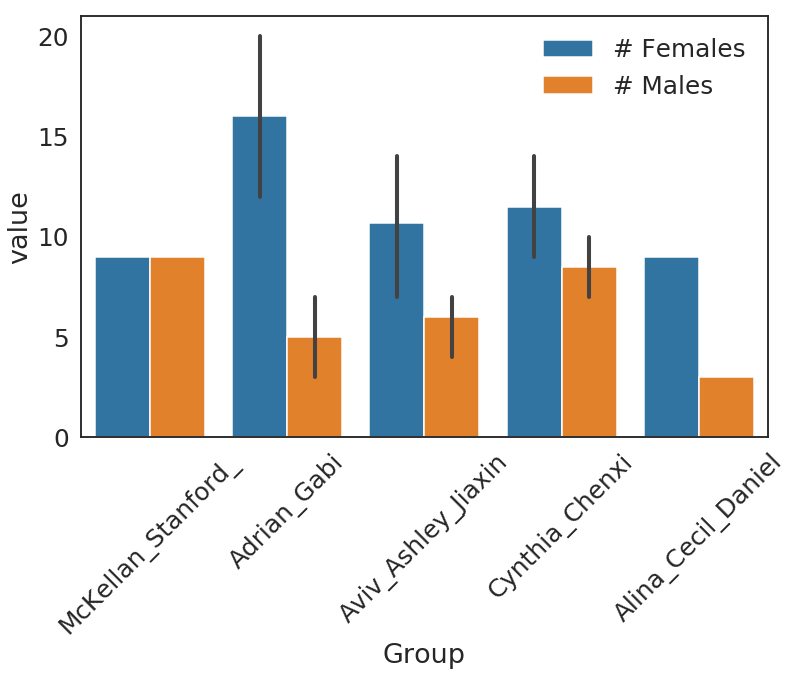

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=master_df_molten, x='Group', y='value', hue='variable')
plt.xticks(rotation=45)
ax.legend(frameon=False)
fig.tight_layout()

fig.savefig('BISC104_Th_A_bar.pdf')

In [18]:
all_df = OrderedDict()
master_df = pd.DataFrame()
for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC-104-Session01-Scientific-Method-Thursday-A.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    df['Group'] = sheet_name
    df[['Time_start', 'Time_end']] = df['Time'].str.split('-', n=1, expand=True)
    df['Time_start'] = pd.to_datetime(df['Time_start'])#.astype(pd.Timestamp)
    df['Time_end'] = pd.to_datetime(df['Time_end'])#.astype(pd.Timestamp)
    df['delta'] = [datetime.timedelta.total_seconds(x) for x in df['Time_end'] - df['Time_start']]
    all_df[sheet_name] = df
    df['# Females'] = df['# Females']/df['delta'].astype(float)
    df['# Males'] = df['# Males']/df['delta']
    master_df = pd.concat([master_df, df], ignore_index=True)
    

In [ ]:
df['delta'] 

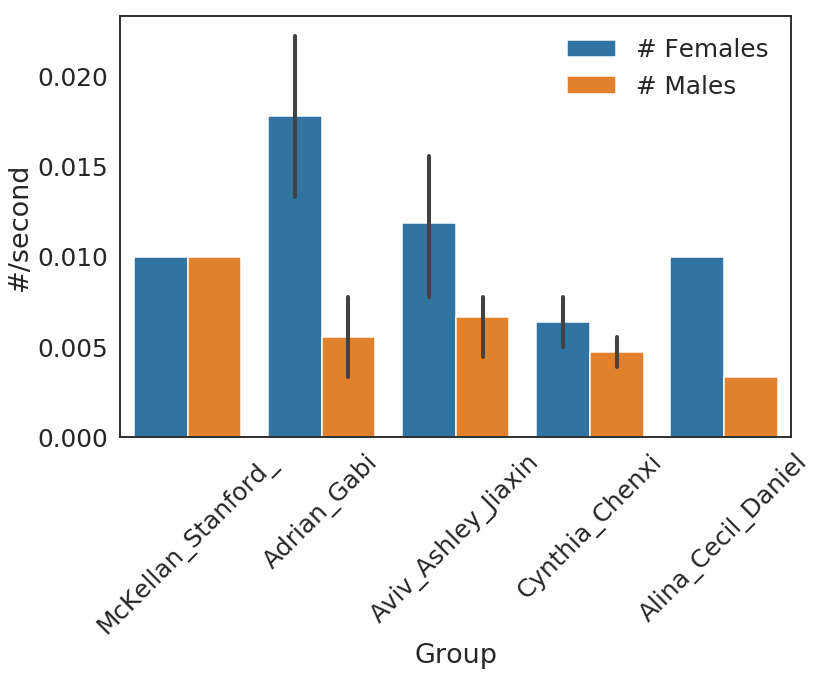

In [19]:
master_df_molten = pd.melt(master_df, id_vars=['Day', 'Time', 'Group'], value_vars=['# Females', '# Males'])
fig, ax = plt.subplots(figsize=(12, 10))
sns.barplot(data=master_df_molten, x='Group', y='value', hue='variable')
plt.xticks(rotation=45)
ax.set_ylabel('#/second')
fig.tight_layout()
ax.legend(frameon=False)
fig.savefig('BISC104_Th_A_bar_normalized.pdf')

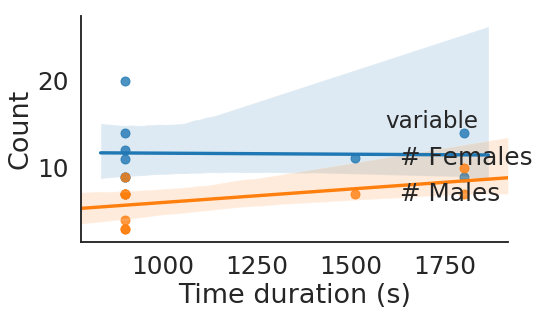

In [20]:
all_df = OrderedDict()
master_df = pd.DataFrame()
for sheet_name in sheet_names[1:]:
    df = pd.read_excel('../BISC-104-Session01-Scientific-Method-Thursday-A.xlsx', sheet_name=sheet_name)
    df.columns = ['Day', 'Time',  '# Females', '# Males']
    df['Group'] = sheet_name
    df[['Time_start', 'Time_end']] = df['Time'].str.split('-', n=1, expand=True)
    df['Time_start'] = pd.to_datetime(df['Time_start'])#.astype(pd.Timestamp)
    df['Time_end'] = pd.to_datetime(df['Time_end'])#.astype(pd.Timestamp)
    df['delta'] = [datetime.timedelta.total_seconds(x) for x in df['Time_end'] - df['Time_start']]
    all_df[sheet_name] = df
    #df['# Females'] = df['# Females']/df['delta'].astype(float)
    #df['# Males'] = df['# Males']/df['delta']
    master_df = pd.concat([master_df, df], ignore_index=True)
master_df_molten = pd.melt(master_df, id_vars=['Day', 'Time', 'Group', 'delta'], value_vars=['# Females', '# Males'])

sns.lmplot(x="delta", y="value", hue="variable", data=master_df_molten, legend_out=True)

plt.xlabel('Time duration (s)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('BISC104_Th_A_bar_timewise.pdf')

In [ ]:
master_df_molten